<a href="https://colab.research.google.com/github/Daisuke0209/sparse_modeling/blob/master/190530_Lasso_ADMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lasso_ADMMの使い方
ハカルスが提供しているスパースモデリング用のライブラリspm-imageの中のadmm.pyに関して使い方を説明する。

## 1.概要-admm.pyとは-
admm.pyは一般化LASSOを解くためのアルゴリズムであるADMM(alternating direction method of multipliers)を利用するためのソフトである

## 2.一般化LASSOとは
一般化LASSOとは以下のような最適化問題である。  
$$
\min_{w\in \mathbb R^N} \frac{1}{2N}||X w-y||^2_2+\alpha ||Dw||_1
$$
ここで、$X \in \mathbb R^{M\times N},y\in \mathbb R^M,D\in \mathbb R^{N\times N},\alpha \in \mathbb R$。  
また、$u\in \mathbb R^N$としたとき、
$$
\begin{align*}
l^2ノルム:&||u||_2 =\sqrt{ \sum_{i=1}^{N} u_i^2 }\\
l^1ノルム:&||u||_1 = \sum_{i=1}^N |u_i|
\end{align*}
$$
となる。

## 3. 一般化LASSOの解法
一般化LASSOの解法として、次の繰り返し計算による方法が知られている。  
<dl class="theorem">　
<dt>一般化LASSOを解くためのADMMアルゴリズム</dt>
<dd>初期ベクトル$z[0],h[0] \in \mathbb R^M$および正数$\rho >0$を与えて、以下を繰り返す。  
$$
\begin{align*}
&w[k+1]=(X^TX+\rho D^TD)^{-1}(X^Ty+\rho D^T(z[k]-h[k]))\\
&z[k+1]=S(Dw[k+1]+h[k],thres)\\
&h[k+1]=h[k]+Dx[k+1]-z[k+1]
\end{align*}
$$
目的関数
$$
I(w)={2N}||X w-y||^2_2+\alpha ||Dw||_1
$$
があらかじめ与えた閾値$tol>0$を下回る、もしくは繰り返し回数がある回数まで達するまで、上を繰り返す。  
ここで、$S(u,thres)$はソフト閾値関数というものであり、以下で定義される。  
$$
\begin{equation*}
    S(w,thres) = 
\begin{cases}
    -w+thres  & w<-thres\\ 
   0 & -thres \leq w \leq thres \\
   w-thres  & w>thres 
\end{cases}
\end{equation*}
$$
($w$がベクトルの場合は、各々の成分に対して上の計算を実行する)
</dd>
</dl>

## 4. 一般化LASSOの実例（画像のノイズ除去）
一般化LASSOの応用例を一つ紹介する。画像のノイズ除去を行う。まず、ノイズが混入した画像$Y=[y_1, \cdots ,y_N]\in \mathbb R ^{N\times N}(y_i\in \mathbb R^N)$を考える。行列$Y$の各列$y_i$に対して、以下の最適化問題を解く。  
$$
\min_{x\in \mathbb R^N} ||y_i-x||_2^2+\alpha \sum_{i=1}^N |x_{i+1}-x_i|
$$  
上記最適化問題の第一項目は、ノイズの混入した観測データとなるべく近いデータ$x$を見つけるための項である。一方、第二項は隣り合うピクセルで画素値があまり変わらないことを求める項であり、**全変動**と呼ばれる。この問題は、一般化LASSOにおける、$X=I$、また、 

$$
D=
\begin{bmatrix}
-1&1&0&\cdots&0\\
0&-1&1&\ddots&\vdots\\
\vdots&\ddots&\ddots&\ddots&0\\
0&\cdots&0&-1&1\\
0&\cdots&0&0&1\\
\end{bmatrix}
$$
の場合に相当する。

## 5. spm-imageによる画像のノイズ除去の実装

### 5-1. spm-imageライブラリのインストール

In [0]:
!git clone https://github.com/hacarus/spm-image.git

Cloning into 'spm-image'...
remote: Enumerating objects: 972, done.
remote: Total 972 (delta 0), reused 0 (delta 0), pack-reused 972
Receiving objects: 100% (972/972), 8.05 MiB | 29.43 MiB/s, done.
Resolving deltas: 100% (559/559), done.


In [0]:
%cd spm-image

/content/spm-image


### 5-2.Google Driveとのマウントを取る

In [0]:
#Google Driveのマウントを取る
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


### 5-3. ライブラリのインポート

In [0]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import *

### 5-4. 画像の読み込み

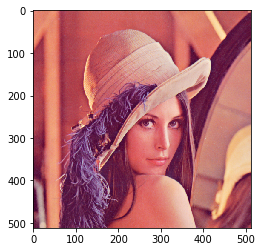

In [0]:
image = Image.open('/content/gdrive/My Drive/Datasets/color/lena.png')
im = np.array(image)
l=512
plt.imshow(im)
pil_img = Image.fromarray(im)
pil_img.convert("RGB").save("lena.jpg","JPEG")

### 5-5. 画像のモノクロ化

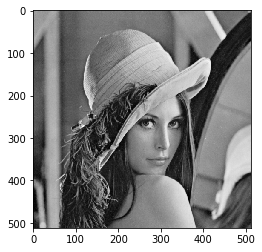

In [0]:
im_gray = 0.299 * im[:, :, 0] + 0.587 * im[:, :, 1] + 0.114 * im[:, :, 2]
plt.gray()
plt.imshow(im_gray)
pil_img = Image.fromarray(im_gray)
pil_img.convert("RGB").save("lena_gray.jpg","JPEG")

### 5-6.画像にノイズ付与

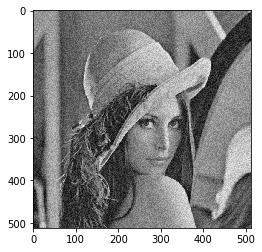

In [0]:
for i in range(l):
  for j in range(l):
    im_gray[i][j]=im_gray[i][j]+randint(50)
plt.gray()
plt.imshow(im_gray)
pil_img = Image.fromarray(im_gray)
pil_img.convert("RGB").save("lena_gray_noise.jpg","JPEG")

In [0]:
n_samples=512
n_features=512
X=np.eye(n_samples)

In [0]:
from spmimage.linear_model import FusedLassoADMM as FL

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
def run_fused_lasso(a,a1,a2):
  clf=FL(alpha=a, sparse_coef=a1, fused_coef=a2, tol=1e-8)
  x=[]
  
  for i in range(l):
    if i%100==0:
      print(i)
    y=im_gray[:][i]
    clf.fit(X,y)
    x.append(clf.coef_)
  x=np.array(x)
  
  plt.gray()
  plt.imshow(x)
  pil_img=Image.fromarray(x)
  pil_img.convert("RGB").save("lena_gray_denoise.jpg","JPEG")

In [0]:
clf.fit(X,im_gray)

FusedLassoADMM(alpha=0.1, copy_X=True, fit_intercept=True, fused_coef=1,
               max_iter=1000, normalize=False, rho=1.0, sparse_coef=0.1,
               tol=1e-08, tridiagonal=False)

0
100
200
300
400
500


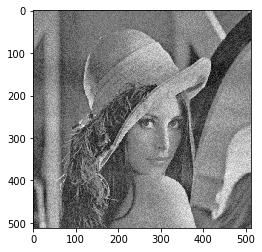

In [0]:
x=run_fused_lasso(0.01,1,0)

0
100
200
300
400
500


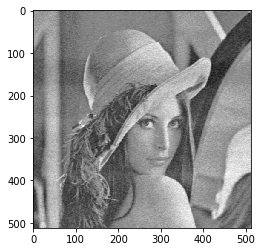

In [0]:
x=run_fused_lasso(0.01,1,1)

0
100
200
300
400
500


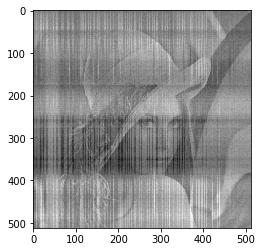

In [0]:
x=run_fused_lasso(0.00000001,0,0)